Text(0, 0.5, 'y')

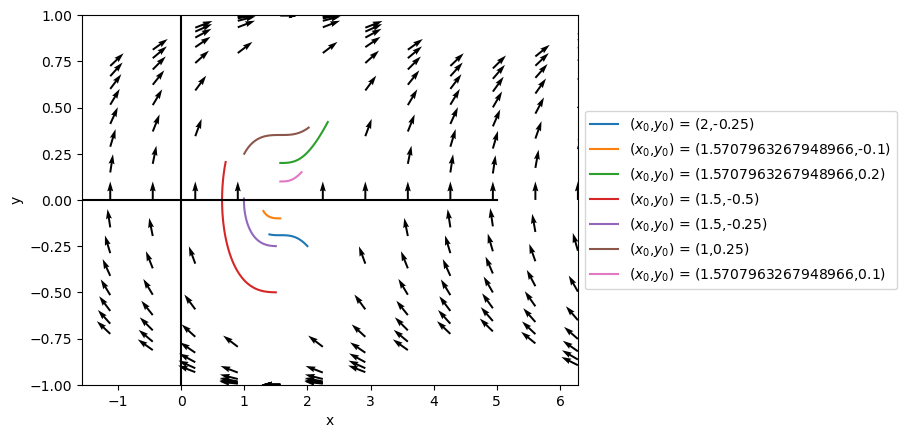

In [65]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def diffeq(t,val):
  x,y = val
  return [y, 1-np.sin(x)]

#xiv, yiv = [-0.43,-2,2,2], [2,-2,-2,2]
xiv, yiv = [2,np.pi/2,np.pi/2,1.5,1.5,1,np.pi/2], [-0.25,-0.1,.2,-.5,-.25,0.25,0.1]

for i in range(7):
    sol = solve_ivp(diffeq, 
                    t_span = [0,3],
                    y0=[xiv[i],yiv[i]],
                    t_eval=np.linspace(0,3,100))
    plt.plot(sol.y[0,:], sol.y[1,:],label='($x_0$,$y_0$) = ('+str(xiv[i])+','+str(yiv[i])+')')
    #plt.plot(sol.t, sol.y[0],'-')
    #plt.plot(sol.t, sol.y[1],'-')

x = np.linspace(-np.pi, np.pi*2, 15) #creating an array for x
y = np.linspace(-2, 2, 15) #creating an array for y

X, Y = np.meshgrid(x, y) #creating a meshgrid over the x-y phase space

DX, DY = diffeq(0, [X, Y]) #assigning the xdot andnydot value at each grid point

# This normalizes the arrows so they are all of unit length and just show the direction
N = np.sqrt(DX**2 + DY**2)
N[N==0] = 1 # eliminate /0 errors, it is sort of optional.
DX /= N
DY /= N

plt.quiver(X, Y, DX, DY) #plots the unit vector arrows at eac grid point
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.plot([0,0],[-5,5],'k')
plt.plot([-5,5],[0,0],'k')
plt.xlim(-np.pi/2,np.pi*2)
plt.ylim(-1,1)
plt.xlabel('x')
plt.ylabel('y')

#Based on this plot, it looks like the fixed points are at 0 and pi instead of +- pi/2

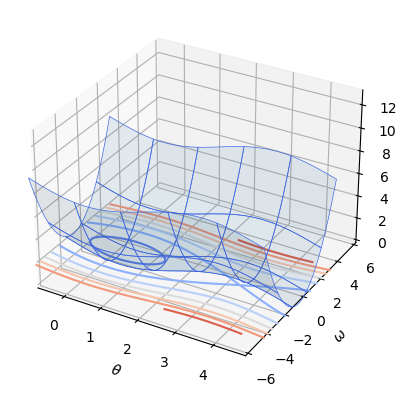

In [27]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget

ax = plt.figure().add_subplot(projection='3d')
x = np.array(np.linspace(-1/2*np.pi,3/2*np.pi,100))
y = np.array(np.linspace(-4,4,100))
X, Y = np.meshgrid(x,y)
Z = 0.5*Y*Y - np.cos(X) -1
# the (+5) in the end raises the 3D surface so that the projections are visible clearly

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=20, cstride=20,
                alpha=0.1)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', offset=-1, cmap='coolwarm')
#ax.contour(X, Y, Z, zdir='x', offset=-2, cmap='coolwarm')
#ax.contour(X, Y, Z, zdir='y', offset=2, cmap='coolwarm')

ax.set(xlim=(-1/5*np.pi, 3/2*np.pi), ylim=(-6, 6), zlim=(0, 13),
       xlabel=r'$\theta$', ylabel=r'$\omega$', zlabel=r'E($\theta$,$\omega$)')

plt.show()